In [41]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [42]:

us_names = 'https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/names/us_names.csv'
df = pd.read_csv(us_names)
df.dropna(inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36277 entries, 0 to 36276
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    36277 non-null  object
 1   gender  36277 non-null  object
dtypes: object(2)
memory usage: 567.0+ KB


In [43]:
# Counting how many Female and Male examples exist
df['gender'].value_counts()


gender
F    21789
M    14488
Name: count, dtype: int64

In [44]:
# Checking how many Female and Male names are there in the dataset
gender_counts = df['gender'].value_counts()

# Finding the smaller class size so both genders can made equal
min_count = min(gender_counts)

# Randomly selecting the same number of Female names as the smaller class
df_f = df[df['gender'] == 'F'].sample(min_count, random_state=42)

# Randomly selecting the same number of Male names as the smaller class
df_m = df[df['gender'] == 'M'].sample(min_count, random_state=42)

# Combineing both samples into one balanced dataset and reset the index
df = pd.concat([df_f, df_m]).reset_index(drop=True)

df['gender'].value_counts()


gender
F    14488
M    14488
Name: count, dtype: int64

In [45]:
# Converting all names to lowercase and remove extra spaces
df['name'] = df['name'].astype(str).str.lower().str.strip()
df.head()


,name,gender
0,brennen,F
1,chikaima,F
2,zoejane,F
3,teegan,F
4,alanda,F


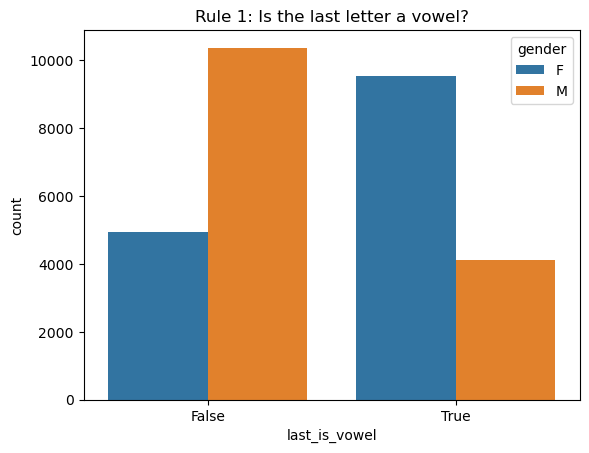

In [46]:
# Createing a new column its True if the last letter of the name is a vowel 
df['last_is_vowel'] = df['name'].str[-1].isin(list('aeiou'))

# Ploting how this rule separates gender
sns.countplot(data=df, x='last_is_vowel', hue='gender')
plt.title("Rule 1: Is the last letter a vowel?")
plt.show()


In [47]:
#Rule 1 If last letter is vowel predict Female orelse predict Male
pred_rule1 = np.where(df['last_is_vowel'], 'F', 'M')

# Calculateing  accuracy
acc_rule1 = (df['gender'] == pred_rule1).mean()

print("Accuracy (Rule 1 - last letter vowel):", acc_rule1)


Accuracy (Rule 1 - last letter vowel): 0.688017669795693


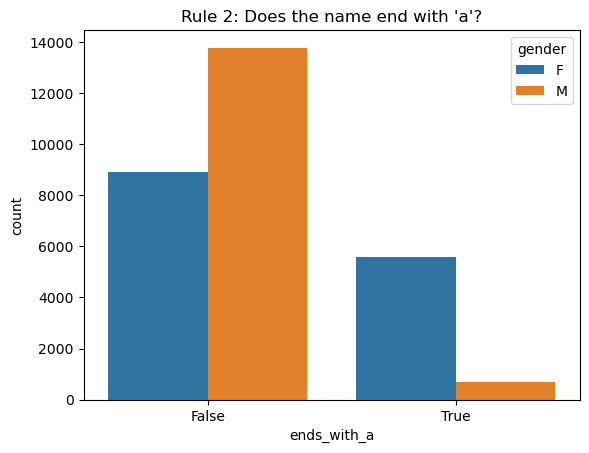

Accuracy (Rule 2 - ends with 'a'): 0.668725842076201


In [48]:
# Rule 2 True if the name ends with 'a'
df['ends_with_a'] = df['name'].str.endswith('a')
sns.countplot(data=df, x='ends_with_a', hue='gender')
plt.title("Rule 2: Does the name end with 'a'?")
plt.show()
# Makeing predictions using this rule that if the name ends with  'a' predict F or else predict M
pred_rule2 = np.where(df['ends_with_a'], 'F', 'M')

# Calculateing accuracy
acc_rule2 = (df['gender'] == pred_rule2).mean()

print("Accuracy (Rule 2 - ends with 'a'):", acc_rule2)


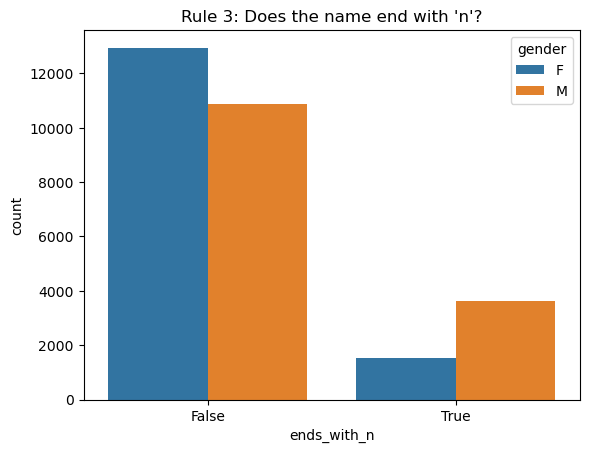

Accuracy (Rule 3 - ends with 'n'): 0.5714729431253451


In [49]:
# Rule 3 True if name ends with 'n'
df['ends_with_n'] = df['name'].str.endswith('n')
sns.countplot(data=df, x='ends_with_n', hue='gender')
plt.title("Rule 3: Does the name end with 'n'?")
plt.show()

# If the name ends with 'n' predict Male or else predict Female
pred_rule3 = np.where(df['ends_with_n'], 'M', 'F')

# Calculating Accuracy
acc_rule3 = (df['gender'] == pred_rule3).mean()

print("Accuracy (Rule 3 - ends with 'n'):", acc_rule3)



CONCLUSION

After testing multipel rules the rule based on the last worde being a vowel performed the best with an accuracy of about 68.8% the rule with the last word ending with "a" aslo preformed good with an accuracy of 66.9% Howevere the rule with thw last word of the name ending with "n"performed poorly with thw lowest accuracy and was not a strong seperator

PART 2

In [54]:
def predict_one(name):  
    # taking in input clean and in   lowercase 
    name = str(name).strip().lower()

    # If name is empty return default
    if len(name) == 0:
        return 'M'

    # Strong female endings checkeing this first because they are more specific
    if name.endswith(('a', 'ie', 'y')):
        return 'F'

    # Strong male endings as noticed in the dataset
    if name.endswith(('k', 'd', 'n', 'r')):
        return 'M'

    #  this is the general vowel rule 
    if name[-1] in 'aeiou':
        return 'F'

    
    return 'M'


In [55]:

predictions = [predict_one(name) for name in df.name]
accuracy = sum(df.gender == predictions) / len(df)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6928147432357813


CONCLUSION 

Simple rule based function to predict gender based on the patter observed in the data. Female names ends with letter from the vowles like a,e,i,o,u andmany names for the male endes with k,d,n,r so i made a rule that names ending with vowles are more like to be female useing this the model achived  69% accuracy on the balanced data set 
